In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Final_data.csv')

In [4]:
validation_df = df[(df['Year'] >= 2017) & (df['Year'] <= 2019)]
years = validation_df['Year'].astype(str)  # Convert year to string to ensure it's treated as a categorical variable
dummies1 = pd.get_dummies(years, prefix='year', drop_first=False)
validation_df = pd.concat([validation_df, dummies1], axis=1)
validation_df

,Entity,Code_x,Year,low_physical_activity,non_exclusive_breastfeeding,air_pollution,child_wasting,high_systolic_blood_pressure,high_fasting_plasma_glucose,child_stunting,...,substance_use_disorders,skin_and_subcutaneous_diseases,musculoskeletal_disorders,neoplasms,neurological_disorders,sense_organ_diseases,mental_disorders,year_2017,year_2018,year_2019
27,Afghanistan,AFG,2017,101967.6250,188821.83000,1909456.500,1.234061e+06,960905.44,719301.50,317847.34000,...,550.0,900.0,1710.0,4400.0,2120.0,840.0,3730.0,1,0,0
28,Afghanistan,AFG,2018,105824.5550,168949.61000,1867562.400,1.155834e+06,991909.06,750877.44,309032.70000,...,550.0,920.0,1760.0,4460.0,2150.0,850.0,3820.0,0,1,0
29,Afghanistan,AFG,2019,109543.5600,158456.20000,1849170.000,1.089128e+06,1019765.90,782584.25,268617.88000,...,530.0,960.0,1840.0,4650.0,2230.0,870.0,3990.0,0,0,1
57,Albania,ALB,2017,4559.9365,443.58765,48444.000,4.118836e+03,131161.80,44884.54,954.61536,...,1120.0,1570.0,7110.0,14420.0,6040.0,3160.0,5440.0,1,0,0
58,Albania,ALB,2018,4706.0840,424.79782,48262.516,3.959849e+03,133140.33,46637.68,906.44160,...,1120.0,1560.0,7110.0,14520.0,6060.0,3190.0,5400.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,Zambia,ZMB,2018,7562.2524,70446.89000,592360.200,5.525369e+05,259179.61,185851.89,103389.58000,...,470.0,1200.0,1700.0,4160.0,1880.0,920.0,2950.0,0,1,0
5519,Zambia,ZMB,2019,7948.1810,66207.04000,582907.100,5.168744e+05,267439.10,192946.90,94849.71000,...,500.0,1250.0,1810.0,4340.0,1950.0,950.0,3090.0,0,0,1
5547,Zimbabwe,ZWE,2017,7655.2163,60760.78000,625386.400,4.729722e+05,297975.16,271637.40,55018.60500,...,630.0,910.0,1800.0,4840.0,1880.0,1050.0,2360.0,1,0,0
5548,Zimbabwe,ZWE,2018,7862.5596,57715.00400,609545.300,4.531539e+05,303253.00,276985.75,53059.62500,...,660.0,940.0,1900.0,5080.0,1970.0,1100.0,2470.0,0,1,0


In [5]:
df = df[df['Year'] < 2017]

In [6]:
years = df['Year'].astype(str)  # Convert year to string to ensure it's treated as a categorical variable
dummies = pd.get_dummies(years, prefix='year', drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [7]:
df.columns

Index(['Entity', 'Code_x', 'Year', 'low_physical_activity',
       'non_exclusive_breastfeeding', 'air_pollution', 'child_wasting',
       'high_systolic_blood_pressure', 'high_fasting_plasma_glucose',
       'child_stunting', 'high_body_mass_index', 'secondhand_smoke',
       'unsafe_sanitation', 'unsafe_water_source', 'diet_low_in_vegetables',
       'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use',
       'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency',
       'zinc_deficiency', 'smoking', 'vitamin_a_deficiency',
       'ambient_particulate_matter_pollution', 'Code_y',
       'substance_use_disorders', 'skin_and_subcutaneous_diseases',
       'musculoskeletal_disorders', 'neoplasms', 'neurological_disorders',
       'sense_organ_diseases', 'mental_disorders', 'year_1991', 'year_1992',
       'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997',
       'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_200

In [8]:
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting', 'year_1991', 'year_1992', 'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997', 'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016'
]

target = 'mental_disorders'

# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

In [9]:
df

,Entity,Code_x,Year,low_physical_activity,non_exclusive_breastfeeding,air_pollution,child_wasting,high_systolic_blood_pressure,high_fasting_plasma_glucose,child_stunting,...,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,Afghanistan,AFG,1990,0.027836,0.024400,0.028845,0.022883,0.012752,0.011119,0.035928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1991,0.028048,0.027550,0.030052,0.023825,0.012894,0.011501,0.036887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1992,0.028560,0.033629,0.033379,0.026857,0.013181,0.012025,0.040116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1993,0.029258,0.041021,0.037115,0.031693,0.013562,0.012617,0.046259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1994,0.029971,0.042193,0.039313,0.034272,0.013943,0.013192,0.051652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,Zimbabwe,ZWE,2012,0.002881,0.010559,0.009874,0.007167,0.005299,0.008786,0.003680,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5543,Zimbabwe,ZWE,2013,0.002970,0.009508,0.009626,0.006778,0.005323,0.008917,0.003335,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5544,Zimbabwe,ZWE,2014,0.003108,0.008662,0.009530,0.006553,0.005427,0.009153,0.003190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5545,Zimbabwe,ZWE,2015,0.003236,0.008132,0.009488,0.006623,0.005534,0.009378,0.003420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
pca = PCA(n_components=4)  # Select number of components
merged_df_pca = pca.fit_transform(df.drop(columns=['Entity','Year','Code_x','Code_y']))
merged_df_pca

array([[-0.63789843, -0.02511434,  0.00413961,  0.00084082],
       [-0.67178837, -0.02604624,  0.28926681, -0.10578072],
       [-0.67199236, -0.01985182,  0.30323273, -0.31164024],
       ...,
       [-0.46381934, -0.05916504,  0.18087357,  0.02257545],
       [-0.44501856, -0.05649105,  0.27211556,  0.17631502],
       [-0.42407409, -0.05443201,  0.28105021,  0.2404787 ]])

In [11]:
column_names = [f'PC{i}' for i in range(1, merged_df_pca.shape[1] + 1)]

# Create a new DataFrame
pca_df = pd.DataFrame(data=merged_df_pca, columns=column_names)

In [12]:
pca_df

,PC1,PC2,PC3,PC4
0,-0.637898,-0.025114,0.004140,0.000841
1,-0.671788,-0.026046,0.289267,-0.105781
2,-0.671992,-0.019852,0.303233,-0.311640
3,-0.679552,-0.011851,0.016792,0.053524
4,-0.689711,-0.007058,0.125556,0.143699
...,...,...,...,...
4990,-0.507224,-0.061490,0.384321,-0.361649
4991,-0.482621,-0.060520,0.157242,-0.107179
4992,-0.463819,-0.059165,0.180874,0.022575
4993,-0.445019,-0.056491,0.272116,0.176315


In [13]:
X = pca_df.values  # Features (PC components)
y = df['mental_disorders'].values.ravel()  # Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
param_grid_rbf = {'C': [0.01, 0.1, 1, 10,50,100], 'gamma': [0.01, 0.1, 1, 10,50,100]}

# Initialize GridSearchCV with RBF kernel
grid_search_rbf = GridSearchCV(SVR(kernel='rbf', verbose=True), param_grid_rbf, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search_rbf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_rbf = grid_search_rbf.best_params_
best_estimator_rbf = grid_search_rbf.best_estimator_

print("Best parameters for RBF kernel:", best_params_rbf)

# Evaluate the best RBF model on the test set
accuracy_rbf = best_estimator_rbf.score(X_test, y_test)
print(f"Accuracy with the best RBF model: {accuracy_rbf * 100:.2f}%")

.
*
optimization finished, #iter = 1181
obj = -1.428975, rho = -0.321415
nSV = 1378, nBSV = 1378
..
*
optimization finished, #iter = 1172
obj = -1.429189, rho = -0.321256
nSV = 1370, nBSV = 1370
.
*
optimization finished, #iter = 1169
obj = -1.425708, rho = -0.321008
nSV = 1374, nBSV = 1374
.
*
optimization finished, #iter = 1150
obj = -1.416517, rho = -0.319906
nSV = 1354, nBSV = 1354
...
*
optimization finished, #iter = 1165
obj = -1.419620, rho = -0.321282
nSV = 1372, nBSV = 1372

*
optimization finished, #iter = 1168
obj = -1.407672, rho = -0.321116
nSV = 1364, nBSV = 1364

*
optimization finished, #iter = 1183
obj = -1.423039, rho = -0.321861
nSV = 1378, nBSV = 1378
.
*
optimization finished, #iter = 1180
obj = -1.421936, rho = -0.321394
nSV = 1364, nBSV = 1364
.
*
optimization finished, #iter = 1172
obj = -1.419537, rho = -0.321825
nSV = 1372, nBSV = 1372

*
optimization finished, #iter = 1155
obj = -1.420236, rho = -0.320875
nSV = 1374, nBSV = 1374
*
optimization finished, #iter

*
optimization finished, #iter = 888
obj = -2.922680, rho = -0.358938
nSV = 638, nBSV = 517
*
optimization finished, #iter = 916
obj = -3.001174, rho = -0.359443
nSV = 661, nBSV = 535
*.*
optimization finished, #iter = 1089
obj = -3.574397, rho = -0.351386
nSV = 775, nBSV = 430
*.*
optimization finished, #iter = 1186
obj = -3.606517, rho = -0.353588
nSV = 788, nBSV = 431
*.*
optimization finished, #iter = 1150
obj = -3.630154, rho = -0.352938
nSV = 795, nBSV = 440
*.*
optimization finished, #iter = 1182
obj = -3.564440, rho = -0.352008
nSV = 788, nBSV = 427
*.*
optimization finished, #iter = 1067
obj = -3.570813, rho = -0.350368
nSV = 775, nBSV = 421
*
optimization finished, #iter = 869
obj = -2.908065, rho = -0.357895
nSV = 624, nBSV = 499
*.*
optimization finished, #iter = 1321
obj = -4.313279, rho = -0.355709
nSV = 905, nBSV = 396
*.*.*.*
optimization finished, #iter = 1323
obj = -4.340082, rho = -0.357908
nSV = 930, nBSV = 409
*
optimization finished, #iter = 1122
obj = -3.525891, 

*
optimization finished, #iter = 980
obj = -320.515518, rho = -0.951689
nSV = 595, nBSV = 582
.
*.
*
optimization finished, #iter = 2124
obj = -290.761380, rho = -0.442297
nSV = 606, nBSV = 581
.
*.
*
optimization finished, #iter = 2331
obj = -286.575927, rho = -0.449641
nSV = 586, nBSV = 560
....
*.
*
optimization finished, #iter = 2455
obj = -284.359548, rho = -0.493750
nSV = 595, nBSV = 570
..
*.
*
optimization finished, #iter = 2574
obj = -290.035962, rho = -0.492781
nSV = 603, nBSV = 581
.......

*.*...........*
optimization finished, #iter = 11516
obj = -254.641355, rho = -0.481107
nSV = 588, nBSV = 531
*
optimization finished, #iter = 10182
obj = -259.640218, rho = -0.516561
nSV = 590, nBSV = 534
.....
*.
*
optimization finished, #iter = 2063
obj = -288.766240, rho = -0.518456
nSV = 590, nBSV = 567
..
*....*
optimization finished, #iter = 9619
obj = -263.976704, rho = -0.515680
nSV = 599, nBSV = 540
...
*.
*..
*
optimization finished, #iter = 2182
obj = -285.497097, rho = -0.487

.............................*................*...................................*........*
optimization finished, #iter = 49757
obj = -1201.130895, rho = -0.898597
nSV = 599, nBSV = 519
.........*.......
*
optimization finished, #iter = 51138
*obj = -1252.300344, rho = -0.804473
nSV = 611, nBSV = 527
......
*
optimization finished, #iter = 10099
obj = -1455.087172, rho = -0.881140
nSV = 628, nBSV = 598
.............*...................*
optimization finished, #iter = 40799
obj = -1224.940746, rho = -0.746401
nSV = 607, nBSV = 523
...........................................................................................*..............*..........................................*......*
optimization finished, #iter = 48066
..obj = -1196.969500, rho = -0.690012
nSV = 589, nBSV = 505
...........................*.....*......*
optimization finished, #iter = 54167
.obj = -1230.861692, rho = -0.789884
nSV = 602, nBSV = 518
...................................................*.....
..*
optimiz

*......*......*.
*
optimization finished, #iter = 18780
obj = -2869.893618, rho = -1.084142
nSV = 620, nBSV = 587
...................................
*..................*..
*
optimization finished, #iter = 19804
obj = -2808.192647, rho = -1.068409
nSV = 608, nBSV = 576
.*..............*
optimization finished, #iter = 39769
obj = -114.250599, rho = -0.381448
nSV = 1047, nBSV = 34
.....
*.....
*
optimization finished, #iter = 15347
obj = -2775.769284, rho = -1.144695
nSV = 597, nBSV = 568
.........................
*..*.......*
optimization finished, #iter = 17913
obj = -2751.747989, rho = -1.128646
nSV = 595, nBSV = 566
...*......*
optimization finished, #iter = 32052
obj = -123.191801, rho = -0.389888
nSV = 1047, nBSV = 26
........
*.*........*
optimization finished, #iter = 17250
obj = -2792.141876, rho = -1.101102
nSV = 598, nBSV = 568
....*
optimization finished, #iter = 37756
obj = -121.450432, rho = -0.386021
nSV = 1064, nBSV = 32
.......
.*............*
optimization finished, #ite

................................................................................................................*.....*.....................................................................................................*.................*
optimization finished, #iter = 120583
obj = -481.568512, rho = -0.422668
nSV = 953, nBSV = 78
......................*.............*....*..........*....*........................................*
optimization finished, #iter = 60608
obj = -156.360477, rho = -0.389938
nSV = 1055, nBSV = 16
..*
optimization finished, #iter = 126252
.obj = -454.604491, rho = -0.411759
nSV = 965, nBSV = 75
...............................*.......*....................*............................*
optimization finished, #iter = 56274
obj = -177.979739, rho = -0.394794
nSV = 1088, nBSV = 23
.....*............................*
optimization finished, #iter = 127813
obj = -476.693123, rho = -0.440811
nSV = 956, nBSV = 75
.....................*...............*.
optimization finis

In [16]:
model = SVR(kernel = 'rbf',C=10,gamma=1)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Test Mean Squared Error: 0.0055773279224119714
Test R-squared: 0.8092184420868933


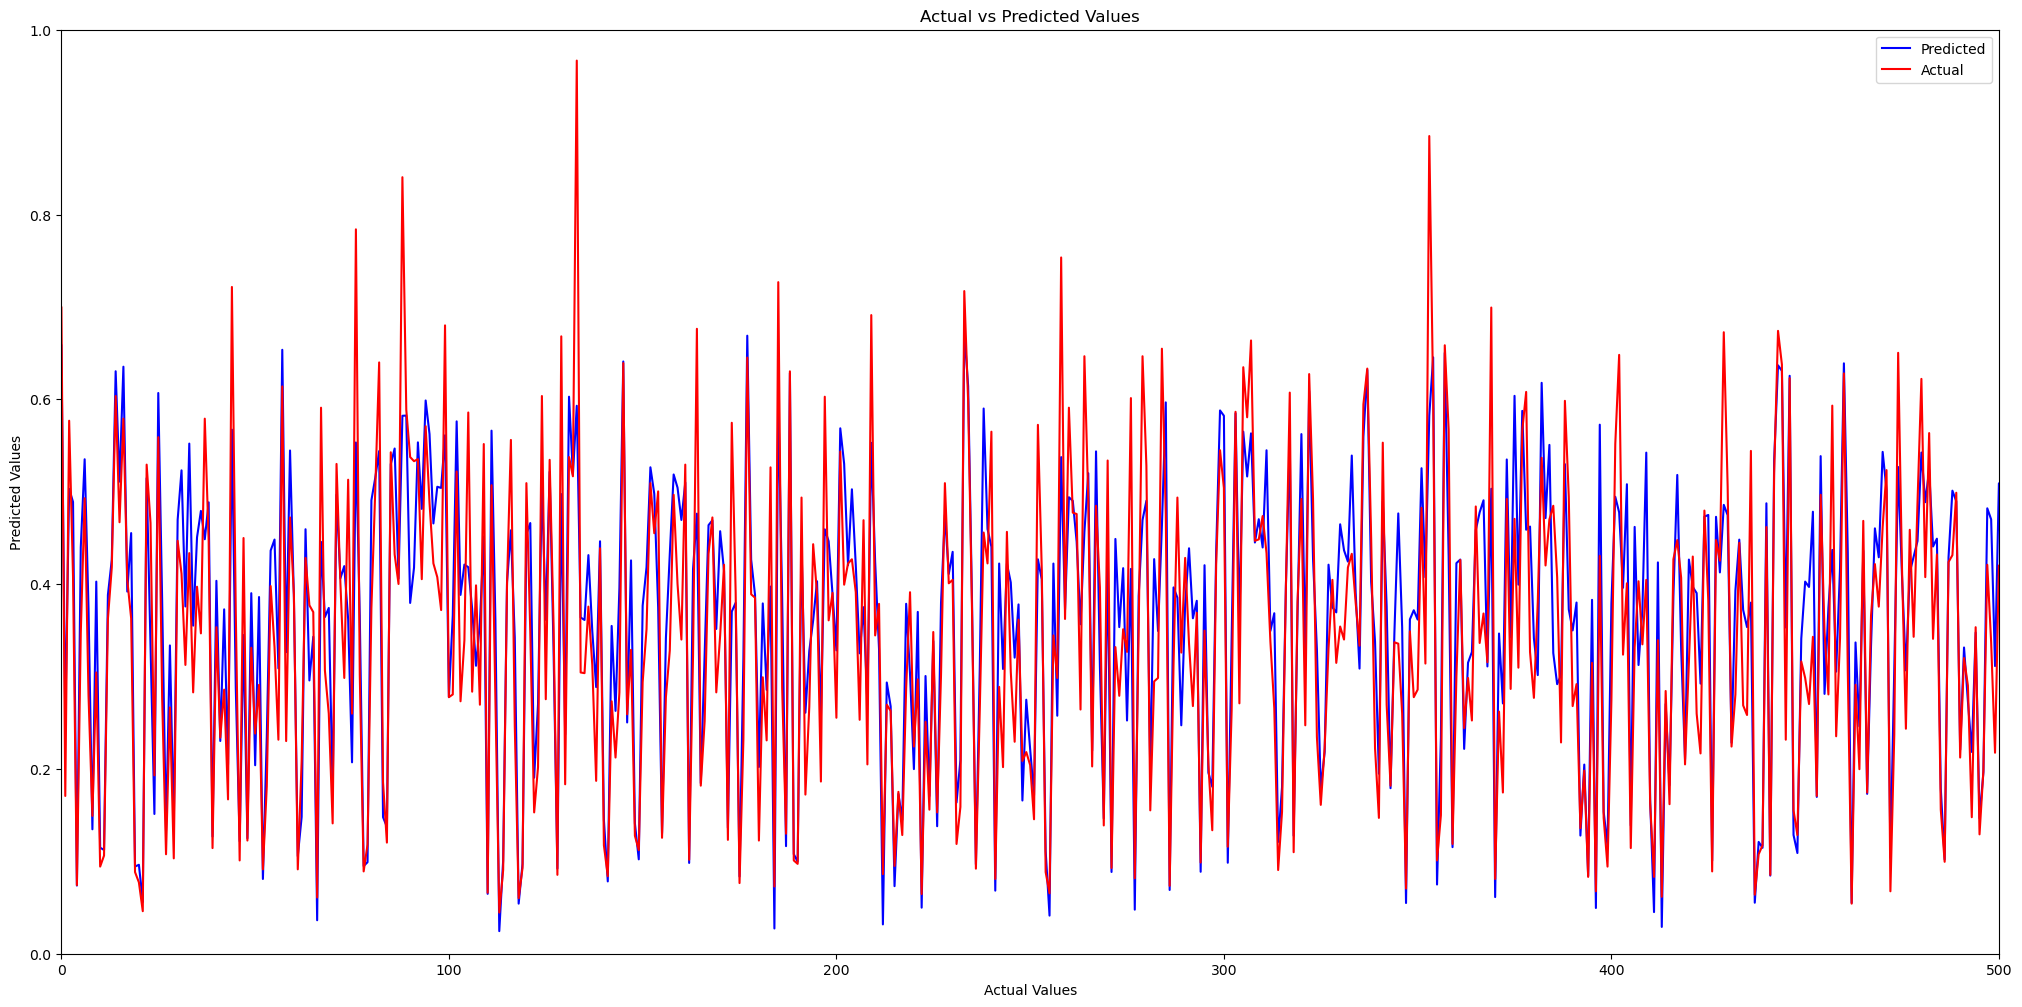

In [17]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(25, 12))  # Enlarge the plot
plt.plot(y_pred, color='blue', label='Predicted')
plt.plot(y_test, color='red', label='Actual')  # Plotting the line y=x for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Set xlim and ylim
plt.xlim(0, 500)  # Adjust the values as needed
plt.ylim(0, 1)  # Adjust the values as needed
plt.show()

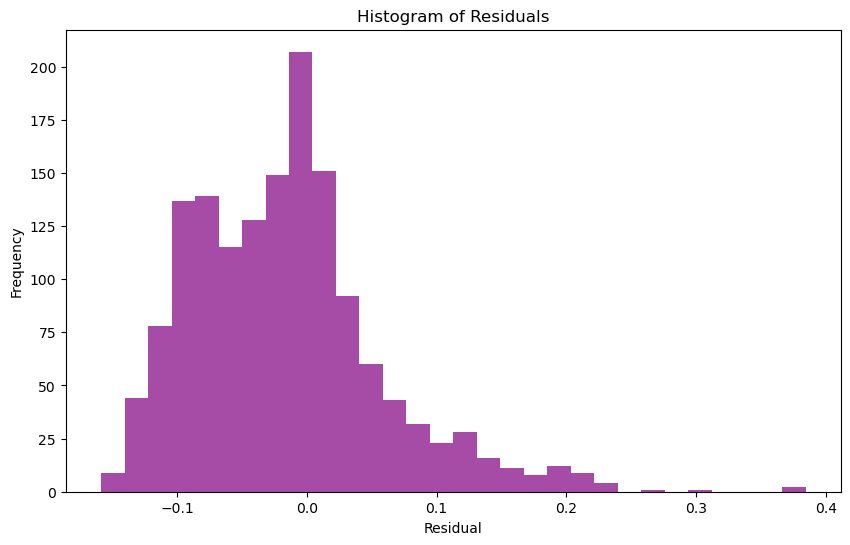

In [18]:
residuals = y_test - y_pred.flatten()
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [19]:
features1 = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]

In [20]:

# Scale the validation data
# scaler = MinMaxScaler()
validation_df[features1] = scaler.fit_transform(validation_df[features1])
validation_df[target] = scaler.fit_transform(validation_df[[target]])

# Apply PCA transformation using the same PCA model fitted on training data
validation_df_pca = pca.fit_transform(validation_df.drop(columns=['Entity','Year','Code_x','Code_y']))
# # Predict the target variable on validation data
# y_validation_pred = model.predict(X_validation_pca)

In [21]:
column_names = [f'PC{i}' for i in range(1, validation_df_pca.shape[1] + 1)]

# Create a new DataFrame
validation_pca_df = pd.DataFrame(data=validation_df_pca, columns=column_names)

In [22]:
x_ = validation_pca_df.values
y_validation_pred = model.predict(x_)

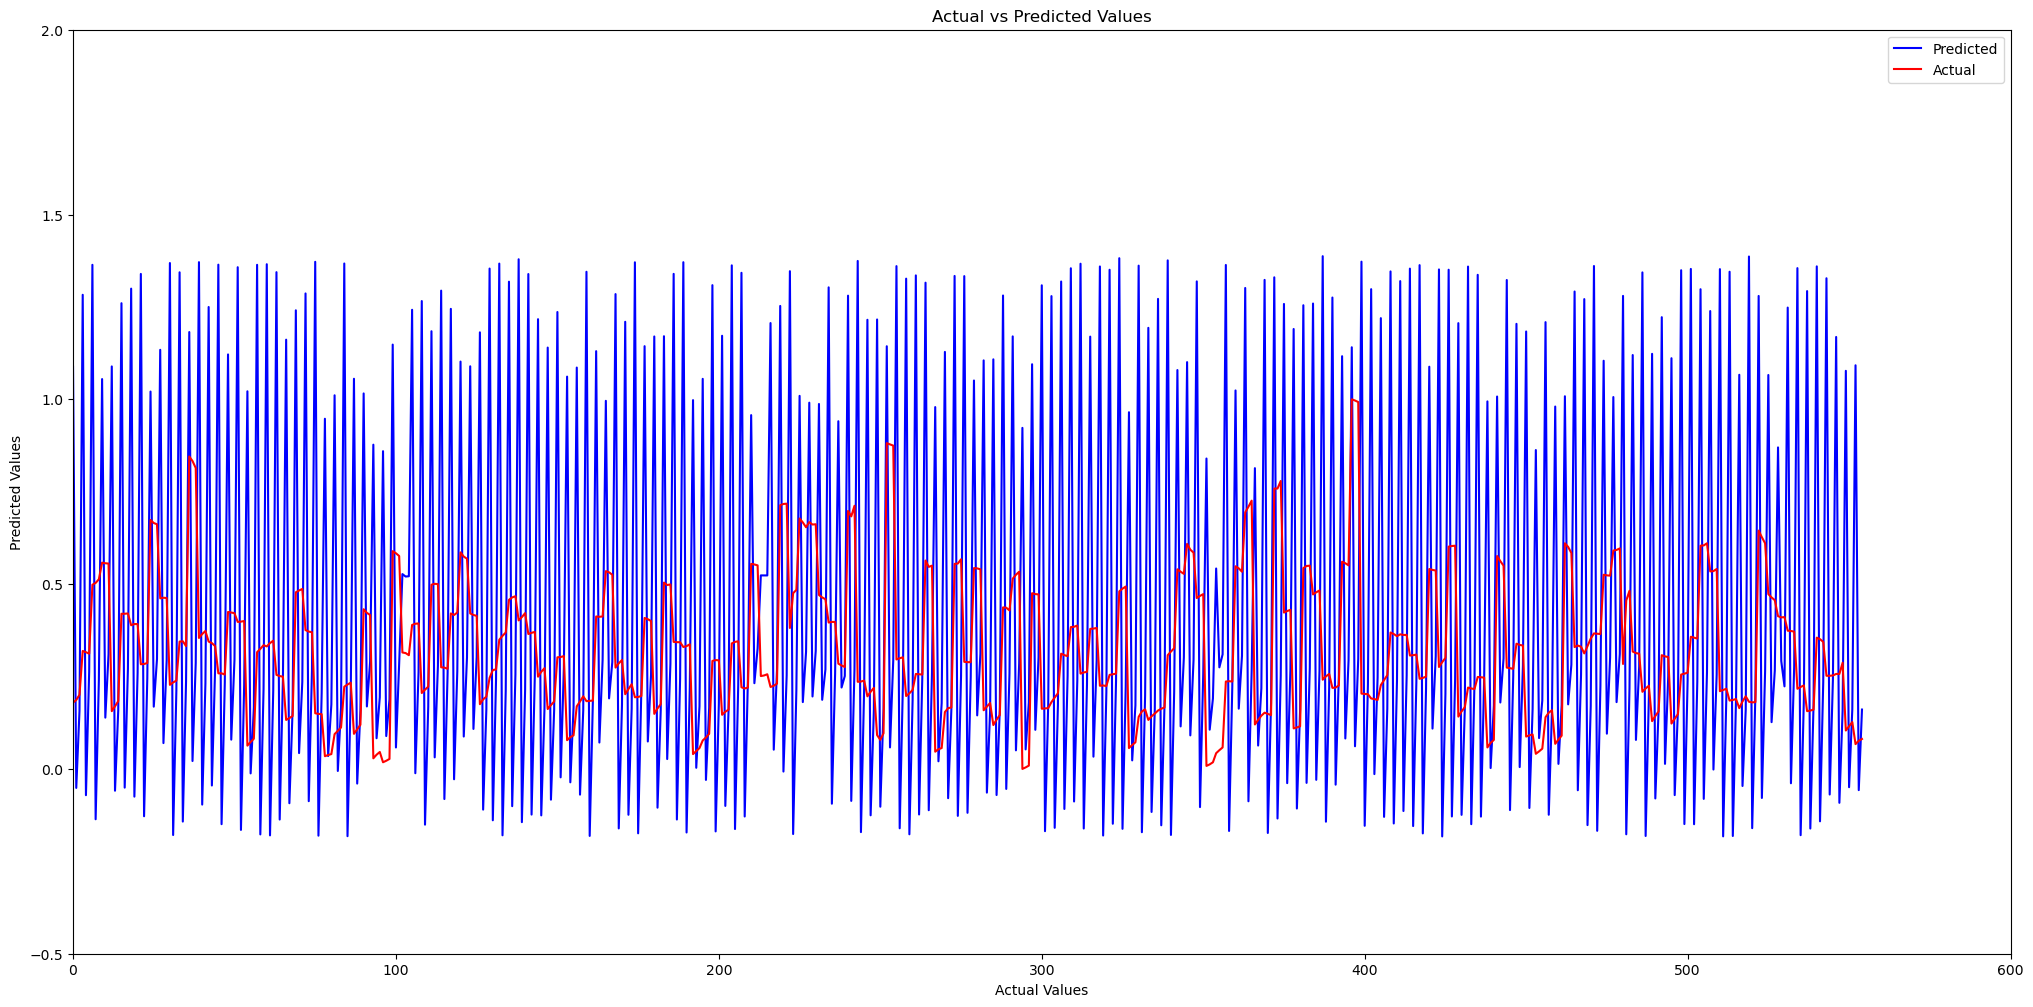

In [23]:
plt.figure(figsize=(25, 12))  # Enlarge the plot
plt.plot(y_validation_pred, color='blue', label='Predicted')
plt.plot(validation_df[target].values, color='red', label='Actual')  # Plotting the line y=x for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Set xlim and ylim
plt.xlim(0, 600)  # Adjust the values as needed
plt.ylim(-0.5, 2)  # Adjust the values as needed

plt.show()

Mean Squared Error: 0.0059187243001733334
R-squared: 0.7975404246345795


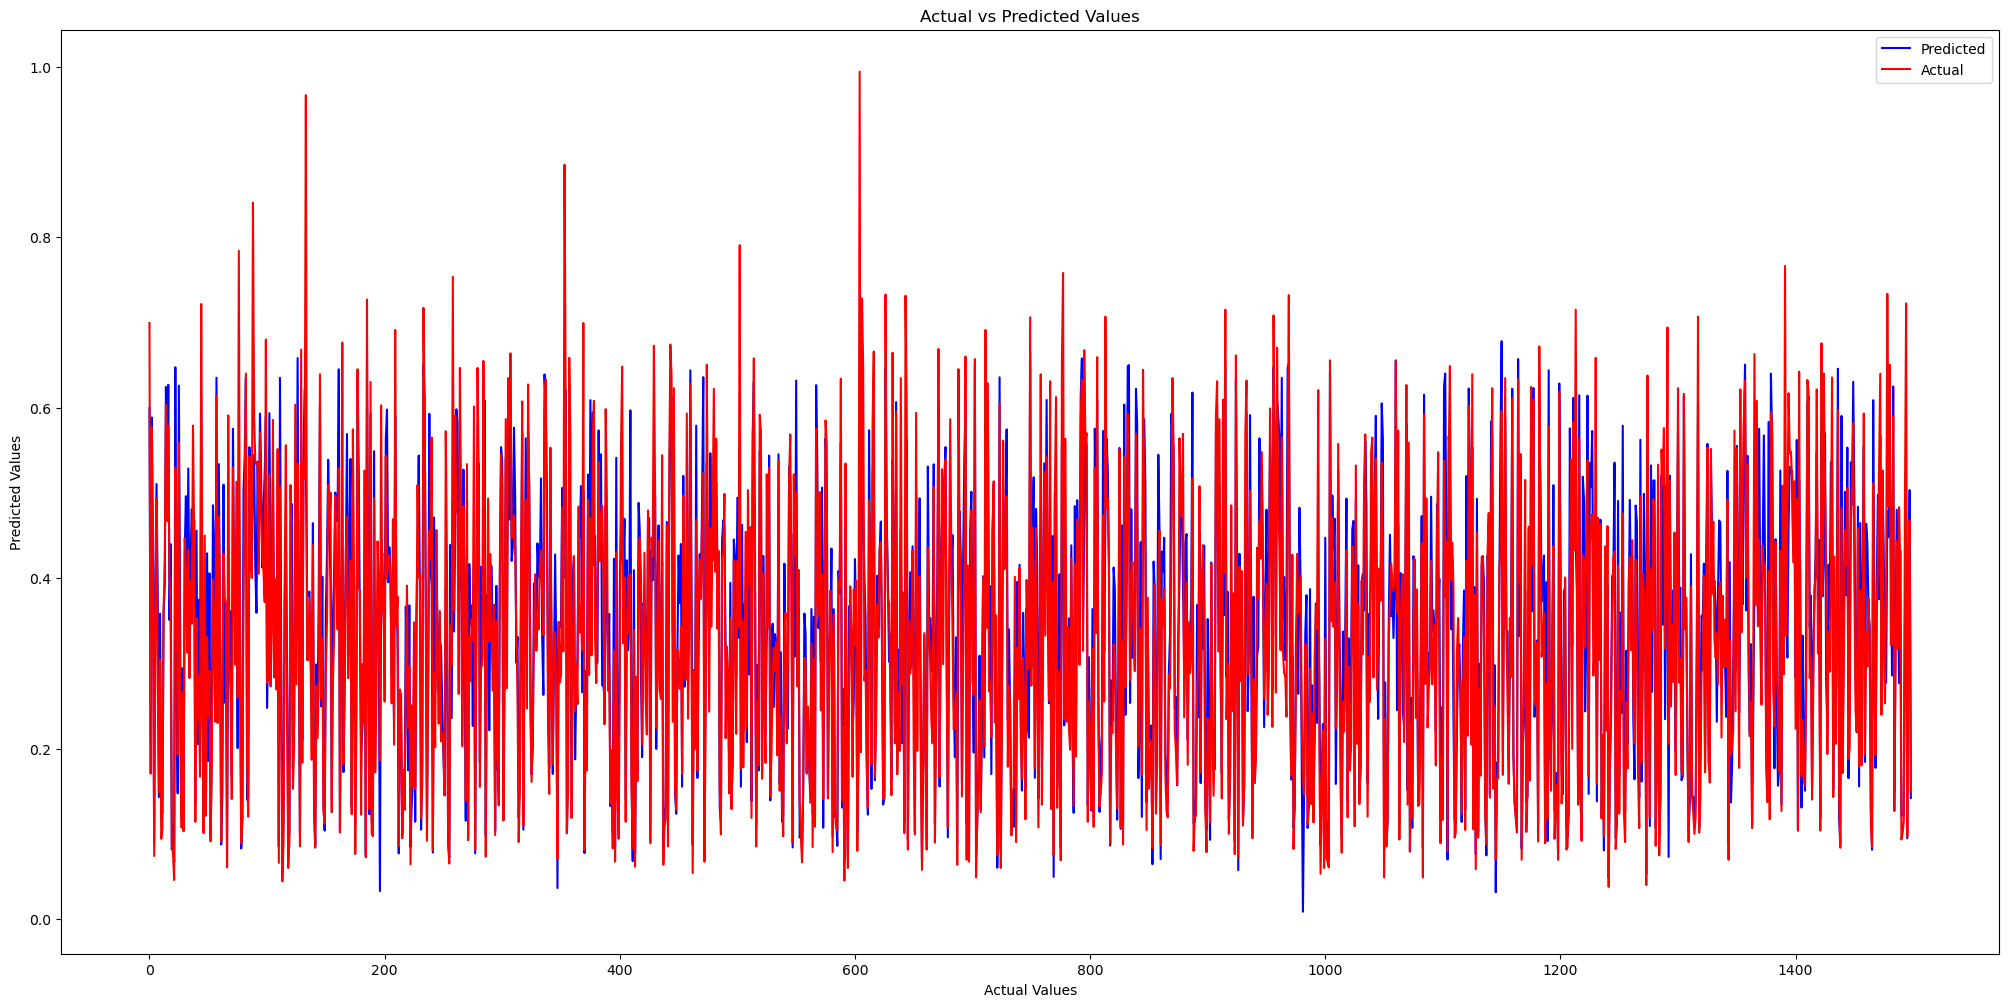

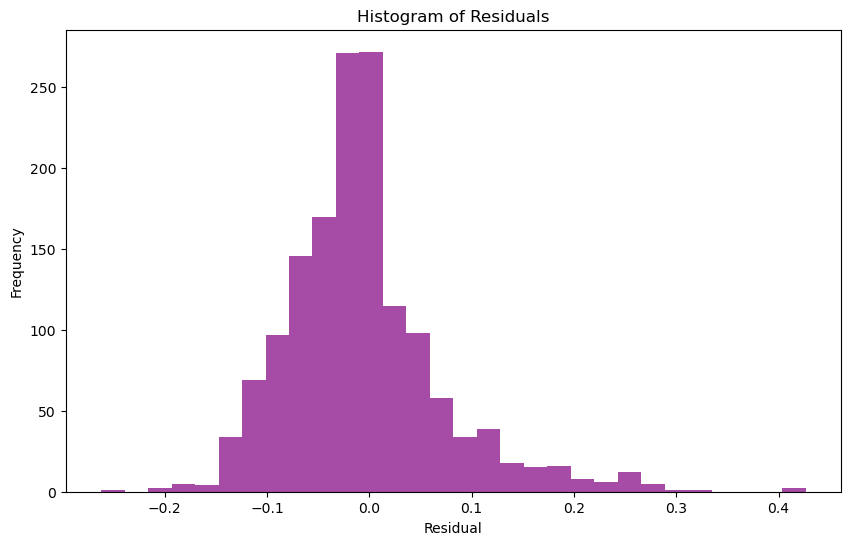

In [24]:
# features = [
#     'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
#     'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
#     'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
#     'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
#     'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
#     'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
#     'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
#     'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
# ]

target = 'mental_disorders'

# Normalize the dataset
# scaler = MinMaxScaler()
# df[features] = scaler.fit_transform(df[features])
# df[target] = scaler.fit_transform(df[[target]])

# Prepare the data for SVR
# X = pca_df.values
# y = df[target].values.ravel()  # Flatten the target array

# Split the data into training and testing sets
# train_size = int(len(X) * 0.7)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# Model Building: SVR with RBF kernel
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Model Evaluation
y_pred = lm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(25, 12))  # Enlarge the plot
plt.plot(y_pred, color='blue', label='Predicted')
plt.plot(y_test, color='red', label='Actual')  # Plotting the line y=x for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Plotting residuals
residuals = y_test - y_pred.flatten()
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [25]:
y_validation_pred_svr = lm_model.predict(x_)

/var/folders/tc/t9c_fvpn08jbwz38bdj660vm0000gn/T/ipykernel_8919/2616200409.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 600,())  # Adjust the values as needed


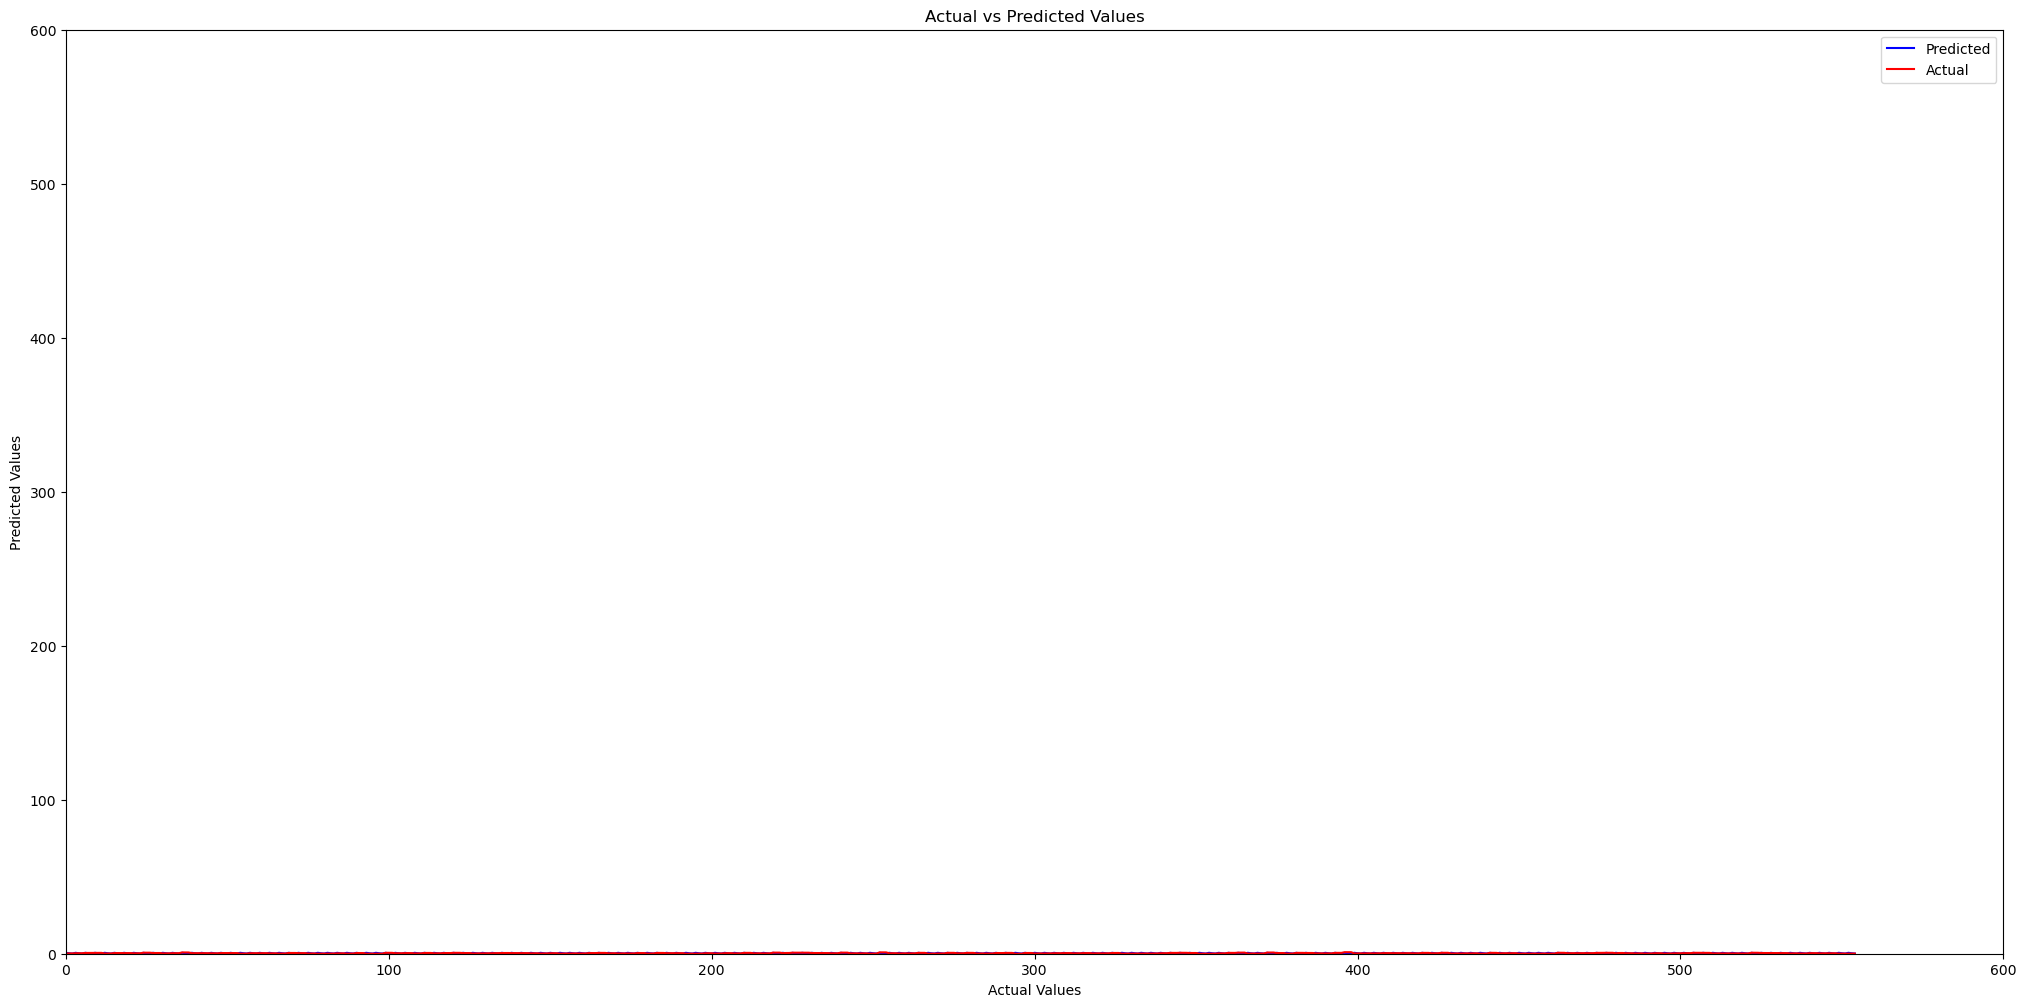

In [26]:
plt.figure(figsize=(25, 12))  # Enlarge the plot
plt.plot(y_validation_pred_svr, color='blue', label='Predicted')
plt.plot(validation_df[target].values, color='red', label='Actual')  # Plotting the line y=x for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Set xlim and ylim
plt.xlim(0, 600)  # Adjust the values as needed
plt.ylim(0, 600,())  # Adjust the values as needed

plt.show()

In [27]:
predicted_actual_df = pd.DataFrame({'Predicted': y_validation_pred_svr, 'Actual': validation_df[target].values})

# Display the DataFrame
mse = mean_squared_error(validation_df[target].values, y_validation_pred_svr)

# Calculate R-squared (R2)
r2 = r2_score(validation_df[target].values, y_validation_pred_svr)

# Display the MSE and R2 scores
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.07625721155047774
R-squared (R2): -1.2248766391571428


In [28]:
predicted_actual_df

,Predicted,Actual
0,0.604743,0.179214
1,0.299532,0.186579
2,0.118151,0.200491
3,0.601928,0.319149
4,0.296723,0.315876
...,...,...
550,0.299741,0.115385
551,0.118363,0.126841
552,0.604805,0.067103
553,0.299557,0.076105


### Lstm

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

4


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0476 - mae: 0.1602 - val_loss: 0.0122 - val_mae: 0.0863 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0152 - mae: 0.0927 - val_loss: 0.0096 - val_mae: 0.0740 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0125 - mae: 0.0837 - val_loss: 0.0102 - val_mae: 0.0797 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mae: 0.0805 - val_loss: 0.0082 - val_mae: 0.0680 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0103 - mae: 0.0747 - val_loss: 0.0090 - val_mae: 0.0743 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - mae: 0.0756 - val_loss: 0.0088 - val_mae: 0.0704 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mae: 0.0772 - val_loss: 0.0079 - val_mae: 0.0664 - learning_rate:

Epoch 47/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0080 - mae: 0.0654 - val_loss: 0.0065 - val_mae: 0.0580 - learning_rate: 0.0010
Epoch 48/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0078 - mae: 0.0639 - val_loss: 0.0066 - val_mae: 0.0595 - learning_rate: 0.0010
Epoch 49/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0077 - mae: 0.0626 - val_loss: 0.0064 - val_mae: 0.0566 - learning_rate: 0.0010
Epoch 50/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0079 - mae: 0.0629 - val_loss: 0.0062 - val_mae: 0.0555 - learning_rate: 0.0010
Epoch 51/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0075 - mae: 0.0616 - val_loss: 0.0065 - val_mae: 0.0587 - learning_rate: 0.0010
Epoch 52/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0076 - mae: 0.0617 - val_loss: 0.0069 - val_mae: 0.0599 - learning_rate: 0.0010
Epoch 53/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0074 - mae: 0.0625 - val_loss: 0.0062 - val_mae: 0.0575 - learnin

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0057 - mae: 0.0538 - val_loss: 0.0057 - val_mae: 0.0542 - learning_rate: 0.0010VM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][Lib

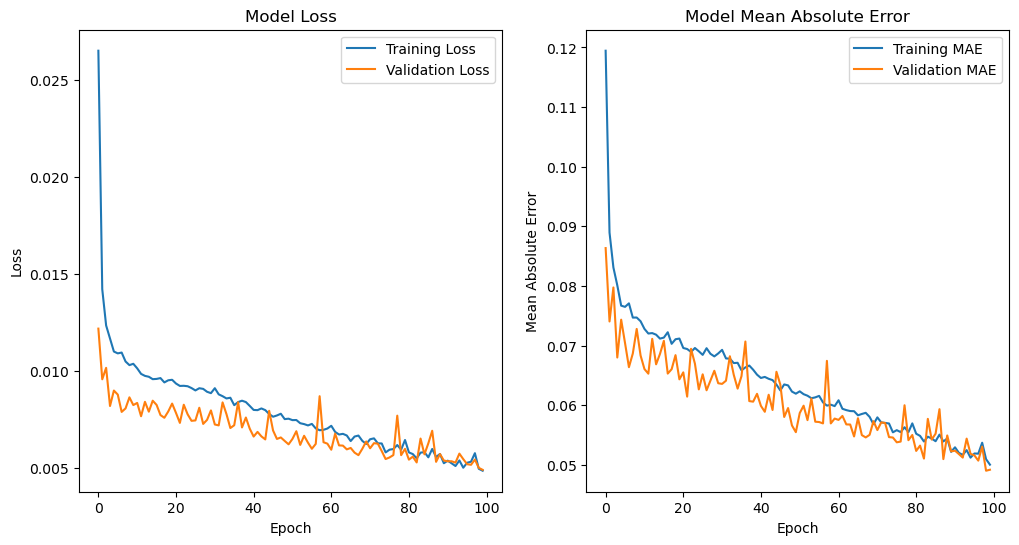

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


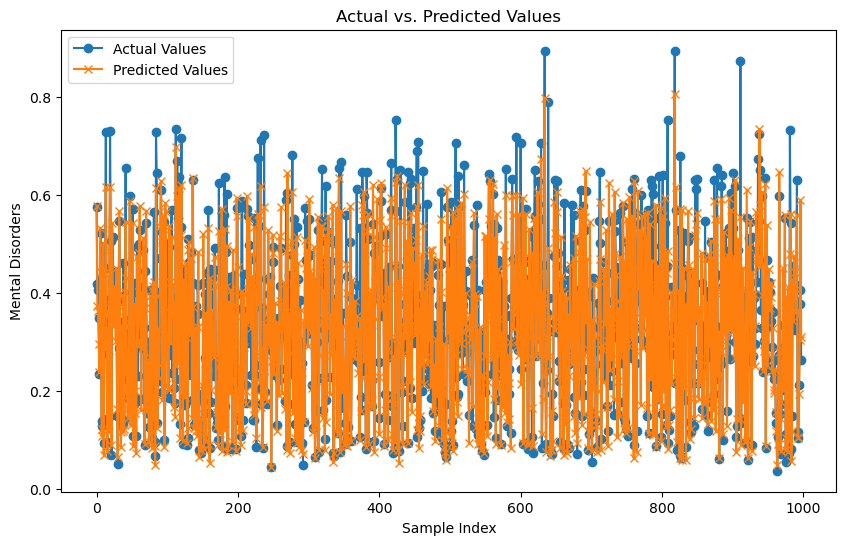

In [32]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout

# Assuming merged_numeric_scaled is the standardized feature data
# Extract the target variable before performing PCA
target_column = 'mental_disorders'
y = df[target_column].values
# Drop the target column from the feature data
X = df.drop(columns=[target_column,'Entity','Code_x','Code_y']).values
# Perform PCA to reduce to 4 components
pca = PCA(n_components=4)
pca_out = pca.fit_transform(X)
# Function to create sequences
def create_sequences(data, target, n_timesteps):
    sequences = []
    targets = []
    for i in range(len(data) - n_timesteps + 1):
        seq = data[i:i + n_timesteps]
        sequences.append(seq)
        targets.append(target[i + n_timesteps - 1])
    return np.array(sequences), np.array(targets)
 
# Assuming each sample should be a sequence of 10 timesteps
n_timesteps = 10
n_features = pca_out.shape[1]
# Create sequences
X_seq, y_seq = create_sequences(pca_out, y, n_timesteps)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
# Print the number of features
print(n_features)
# Create the RNN model with Bidirectional LSTM layers for regression task
model2 = Sequential()
# Bidirectional LSTM layer with Dropout regularization
model2.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(n_timesteps, n_features))))
model2.add(Dropout(0.3))
# Second Bidirectional LSTM layer
model2.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model2.add(Dropout(0.3))
# Third Bidirectional LSTM layer
model2.add(Bidirectional(LSTM(units=64)))
model2.add(Dropout(0.3))
# Output layer for regression task
model2.add(Dense(units=1))
# Compile the model with rmsprop optimizer
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Summary of the model
model2.summary()
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Reduce learning rate on plateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
# Train the model
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])
# Plot training & validation metrics
plt.figure(figsize=(12, 6))
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
# Make predictions
y_pred = model2.predict(X_test)
# Plot actual vs. predicted values using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', linestyle='-', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Values', linestyle='-', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Mental Disorders')
plt.legend()
plt.show()


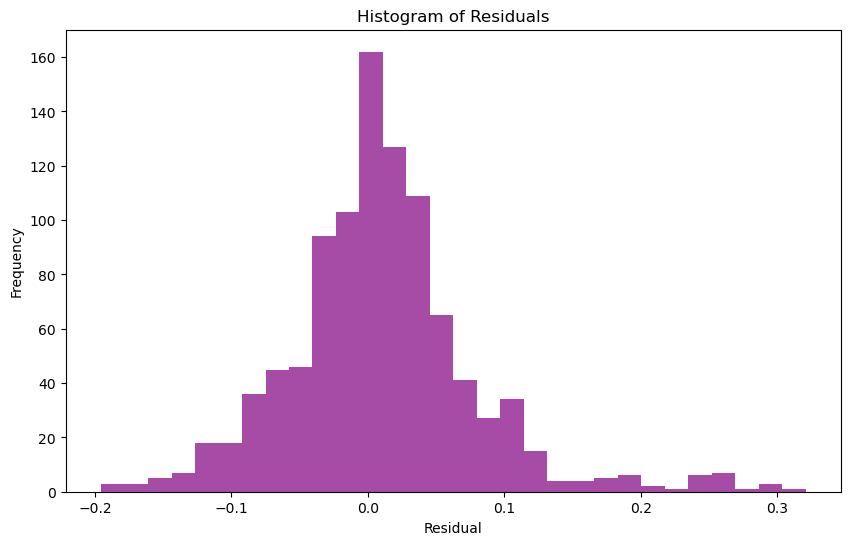

In [33]:
residuals = y_test - y_pred.flatten()
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [34]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8397804939597011
